In [1]:
import csv,pickle,time
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from utils import GeneSeg
from gensim.models.word2vec import Word2Vec

Using TensorFlow backend.


In [2]:

vocabulary_size=5000
plt_dir="data\\word2vec.png"
batch_size=128

In [3]:

start=time.time()
words=[]
datas=[]
with open("data\\xssed.csv","r",encoding="utf-8") as f:
    reader=csv.DictReader(f,fieldnames=["payload"])
    for row in reader:
        payload=row["payload"]
        word=GeneSeg(payload)#泛化分词
        datas.append(word)
        words+=word


In [4]:
print(len(datas))
print(payload)
datas[-1]

33426
method=show&lojaPrincipal=&areaName=busca&nomeLoja=<br/>&tipoLoja=&tipoBusca=comFoto&fetch=30&loja=&palavra=%22%3E%27%3E%3CSCRIPT%3Ealert%28String.fromCharC<br/>ode%2884%2C69%2C83%2C84%2C69%29%29%3C%2FSCRIPT%3E&x=80&y=20


['method=',
 'show',
 'lojaprincipal=',
 'areaname=',
 'busca',
 'nomeloja=',
 '<br',
 '>',
 'tipoloja=',
 'tipobusca=',
 'comfoto',
 'fetch=',
 '0',
 'loja=',
 'palavra=',
 '>',
 '>',
 '<script>',
 'alert(',
 'string.fromcharc',
 '<br',
 '>',
 'ode(',
 '0',
 '0',
 '0',
 '0',
 '0',
 ')',
 ')',
 '</script>',
 'x=',
 '0',
 'y=',
 '0']

In [5]:

#构建数据集
def build_dataset(datas,words):
    count=[["UNK",-1]]
    counter=Counter(words)
    count.extend(counter.most_common(vocabulary_size-1))
    vocabulary=[c[0] for c in count]
    data_set=[]
    for data in datas:
        d_set=[]
        for word in data:
            if word in vocabulary:
                d_set.append(word)
            else:
                d_set.append("UNK")
                count[0][1]+=1
        data_set.append(d_set)
    return data_set


In [6]:
data_set=build_dataset(datas,words)

In [7]:
print(len(data_set))
data_set[-1]

33426


['method=',
 'show',
 'UNK',
 'UNK',
 'busca',
 'UNK',
 '<br',
 '>',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 '0',
 'UNK',
 'palavra=',
 '>',
 '>',
 '<script>',
 'alert(',
 'string.fromcharc',
 '<br',
 '>',
 'ode(',
 '0',
 '0',
 '0',
 '0',
 '0',
 ')',
 ')',
 '</script>',
 'x=',
 '0',
 'y=',
 '0']

In [8]:
embedding_size=128
skip_window=5
num_sampled=64
num_iter=5


model=Word2Vec(data_set,size=embedding_size,window=skip_window,negative=num_sampled,iter=num_iter)
embeddings=model.wv


In [9]:
print(len(embeddings["script"])) #说明embeddings["script"]的纬度是128维
embeddings["script"]

128


array([-4.73984361e-01,  4.79324698e-01,  1.73109991e-04,  5.22730827e-01,
       -7.50209868e-01, -1.79539993e-01,  3.59024078e-01, -7.36752927e-01,
        3.34442317e-01,  2.87724555e-01, -1.14661002e+00,  9.09459054e-01,
       -1.27798593e+00,  4.88483548e-01,  4.26782608e-01, -5.64915657e-01,
       -1.48637724e+00, -1.14390194e+00, -8.35099638e-01, -7.78318465e-01,
       -2.51520216e-01,  2.23566890e-01, -9.55804288e-01, -3.20385545e-01,
       -1.65690958e-01,  9.66209829e-01, -2.78030753e-01,  1.18060327e+00,
       -4.95527327e-01, -8.57077360e-01,  8.73378515e-01,  8.78157020e-01,
       -7.79197156e-01, -9.69149888e-01, -1.84119955e-01,  1.02790284e+00,
        9.07465518e-01,  3.78291845e-01,  1.42277908e+00,  3.29929560e-01,
       -1.73790133e+00,  1.49628913e+00,  3.93474281e-01,  9.98536229e-01,
       -4.20515388e-01, -2.14562035e+00, -7.39880025e-01, -1.53088421e-01,
       -1.01309024e-01, -5.22381663e-01,  1.23224103e+00, -1.78877282e+00,
       -1.39291847e+00,  

In [10]:

def plot_with_labels(low_dim_embs,labels,filename=plt_dir):
    plt.figure(figsize=(10,10))
    for i,label in enumerate(labels):
        x,y=low_dim_embs[i,:]
        plt.scatter(x,y)
        plt.annotate(label,xy=(x,y),xytext=(5,2),
                     textcoords="offset points",
                     ha="right",
                     va="bottom")
        f_text="vocabulary_size=%d;batch_size=%d;embedding_size=%d;skip_window=%d;num_iter=%d"%(
            vocabulary_size,batch_size,embedding_size,skip_window,num_iter
        )
        plt.figtext(0.03,0.03,f_text,color="green",fontsize=10)
    plt.savefig(filename)
    plt.show()



D:\python\Anaconda\Anaconda3\envs\ai\lib\site-packages\sklearn\neighbors\base.py:316: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


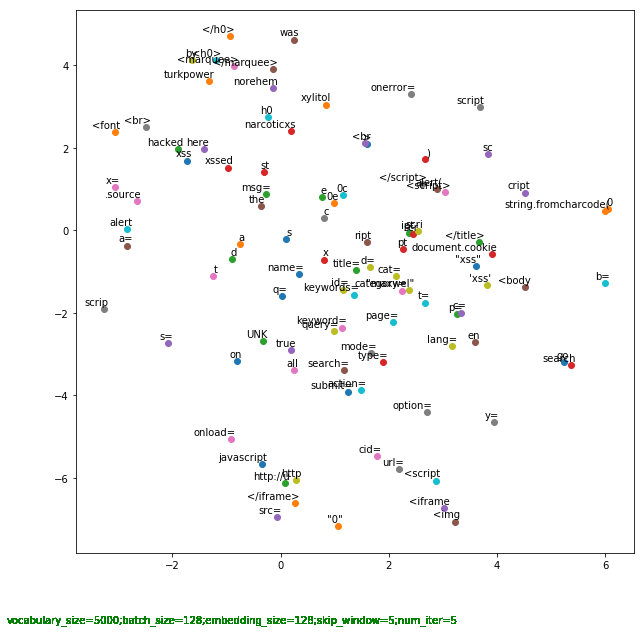

In [11]:
#用于显示plot_only个词与向量的映射关系
plot_only=100

tsne=TSNE(perplexity=30,n_components=2,init="pca",n_iter=7000)
plot_words=embeddings.index2word[:plot_only]
plot_embeddings=[]
for word in plot_words:
    plot_embeddings.append(embeddings[word])
low_dim_embs=tsne.fit_transform(plot_embeddings)
plot_with_labels(low_dim_embs,plot_words)


In [12]:
vec_dir="data\\word2vec.pickle"

def save(embeddings):
    dictionary=dict([(embeddings.index2word[i],i)for i in range(len(embeddings.index2word))])
    reverse_dictionary=dict(zip(dictionary.values(),dictionary.keys()))
    word2vec={"dictionary":dictionary,"embeddings":embeddings,"reverse_dictionary":reverse_dictionary}
    with open(vec_dir,"wb") as f:
        pickle.dump(word2vec,f)


In [13]:
save(embeddings)
end=time.time()
print("Over job in ",end-start)
print("Saved words vec to",vec_dir)

Over job in  53.37248086929321
Saved words vec to data\word2vec.pickle
